# DS 3000 Quiz 2

Due by: Tuesday Oct 24 @ 11:59 PM EST

Time Limit: You have 2 hours to complete the assignment once started

## Instructions

This quiz has 100 points total.

- You are welcome to post a private note on piazza, but to keep a consistent testing environment for all students we are unlikely to provide assistance.
- You may not contact other students with information about this this quiz
    - even saying "it was easy/hard" in a general sense can introduce a bias in favor of students who take the quiz earlier or later
- Under no circumstances should you share a copy of this quiz with anyone who isn't a member of the course staff.
- Take this quiz with open notes and feel free to access any online resource / documentation you'd like.  

### Submission Instructions
After completing the quiz below, please follow the instructions below to submit:
1. "Kernel" -> "Restart & Run All"
1. save your quiz file to this latest version
1. upload the `.ipynb` to gradescope **before** clicking submit
1. ensure that you can see your jupyter notebook in the gradescope interface after clicking "submit"

We specify the last note above as gradescope has allowed students to "submit" without uploading a file.  It is your responsibility to ensure that you've actually submitted a file.

### Academic Integrity Pledge

Input your name below to sign the Academic Integrity Pledge before continuing with the quiz. Failure to do so will result in a score of **0**.

In [1]:
name = 'Sean Ayoub'
print(f'I, {name}, declare that the following work is entirely my own, and that I did not copy or seek help from any students who have currently or previously taken this course, nor from any online source other than private messages between myself and the professor on Piazza/via email.')

I, Sean Ayoub, declare that the following work is entirely my own, and that I did not copy or seek help from any students who have currently or previously taken this course, nor from any online source other than private messages between myself and the professor on Piazza/via email.


In [2]:
# the following modules will be necessary to complete the quiz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Exploring, Summarizing and Graphing Data (100 points)

This problem will make use of the `car_crashes` dataset in the seaborn module. This dataset looks at accidents in the states of the USA. This is the data set of the cause of the accidents and the cost to the accident insurance companies. The features of the dataset are:

- `total`: Number of drivers involved in fatal collisions per billion miles
- `speeding`: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
- `alcohol`: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
- `not_distracted`: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
- `no_previous`: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
- `ins_premium`: Car Insurance Premiums
- `ins_losses`: Losses incurred by insurance companies for collisions per insured driver
- `abbrev`: USA states

Each part of this problem has you explore the dataset in different ways, including indexing and summarizing statistically. The data are loaded below.

**Note Also:** Your response need not build any functions, but be sure to name variables appropriately and document your process.

In [3]:
df_crash = sns.load_dataset('car_crashes')
df_crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Part 1.1 (5 pts)
Return the first 3 rows of df_crash.

In [4]:
df_crash.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


#### Part 1.2 (10 pts)
Return the `.head()` of the dataframe of those states whose `alcohol` value is smaller than the average `alcohol` value in the dataset.

In [5]:
avg = df_crash["alcohol"].mean()

small_alcohol = df_crash["alcohol"] < avg
df_crash[small_alcohol].head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE


#### Part 1.3 (15 pts)
Add a column called `region` to df_crash, where the regions are defined as in the next cell. Print the `.head()` of the resulting df_crash to ensure it worked.

In [6]:
west = ['AK', 'HI', 'CA', 'OR', 'WA', 'ID', 'NV', 'UT', 'CO', 'WY', 'MT']
southwest = ['AZ', 'NM', 'TX', 'OK']
midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']
southeast = ['AR', 'LA', 'MS', 'TN', 'KY', 'AL', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'DE', 'MD', 'DC']
northeast = ['PA', 'NJ', 'CT', 'RI', 'NY', 'MA', 'NH', 'VT', 'ME']

In [7]:
region_list = []

for index, row in df_crash.iterrows():
    if row["abbrev"] in west:
        region_list.append("west")
    if row["abbrev"] in southwest:
        region_list.append("southwest")
    if row["abbrev"] in midwest:
        region_list.append("midwest")
    if row["abbrev"] in southeast:
        region_list.append("southeast")
    if row["abbrev"] in northeast:
        region_list.append("northeast")

region_series = pd.Series(region_list)
df_crash["region"] = region_series
df_crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,region
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,southeast
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,west
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,southwest
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,southeast
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,west


#### Part 1.4 (10 pts)
Calculate and display the median of each numerical feature in the dataframe.

In [11]:
df_crash.median(numeric_only = True)

total              15.600
speeding            4.608
alcohol             4.554
not_distracted     13.857
no_previous        13.775
ins_premium       858.970
ins_losses        136.050
dtype: float64

#### Part 1.5 (10 pts)
Calculate and display the average `speeding` for each `region` (as created in 2.3).

In [9]:
df_crash.groupby("region").speeding.mean()

region
midwest      4.215583
northeast    4.370444
southeast    4.974267
southwest    6.033500
west         6.021727
Name: speeding, dtype: float64

#### Part 1.6 (10 pts)
Build a dataframe of the average numerical features in every region (dataframe should thus have 5 rows, one for each region). Do not include non-numeric features which can't be averaged, like `abbrev`; **Hint**: you may want to read the [`.mean` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) to help you figure this one out.

In [15]:
df_crash.groupby("region").mean(numeric_only = True)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
region,,,,,,,
midwest,15.558333,4.215583,4.996917,13.939000,13.456917,756.630833,123.995833
northeast,12.455556,4.370444,3.934556,11.217222,10.445444,977.255556,137.926667
southeast,17.700000,4.974267,5.260400,14.769267,15.771000,952.834667,149.888000
southwest,19.075000,6.033500,5.829750,15.978500,17.868000,913.895000,141.697500
west,14.972727,6.021727,4.693364,12.596000,13.701818,855.624545,119.522727


#### Part 1.7 (10 pts)
Use the original dataframe to calculate and display the correlation matrix (all pairwise correlations) between the numeric features.

In [13]:
df_crash.corr(numeric_only = True)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


#### Part 1.8 (10 pts)
Based on the correlation matrix from the previous part, which two features are most strongly related? Which seem least likely to be related? What is the danger with only using the correlation to assess relationships?

Looking at the correlation matrix, the total number of drivers involved in collisions and the percentage of drivers who had not been involved in any previous accidents had the strongest positive correlation with a coefficient of 0.96. On the other hand, the percentage of drivers who had not been involved in any previous accidents and the losses incured by insurance companies for collisions had the weakest correlation at -0.0063, signifiying little to no relationship between the variables. The danger with only using correlation to assess relationships is that just because two variables are correlated does not mean they have anything to do with each other.

#### Part 1.9 (10 pts)
Use the `.pairplot` function from seaborn to create a scatterplot matrix of the numeric features in the original data frame. Make sure that your plot has:

- An informative title
- Well labeled, *readable* axes

**Then** in a markdown cell, discuss if any of the pairs of features have relationships that correlation would not be adequate in describing.

**Note:** when I run this, I get a warning that the figure layout has changed to tight; as long as you can see the plot, don't worry about that.

Text(0.5, 0.98, 'car crash features scatterplot matrix')

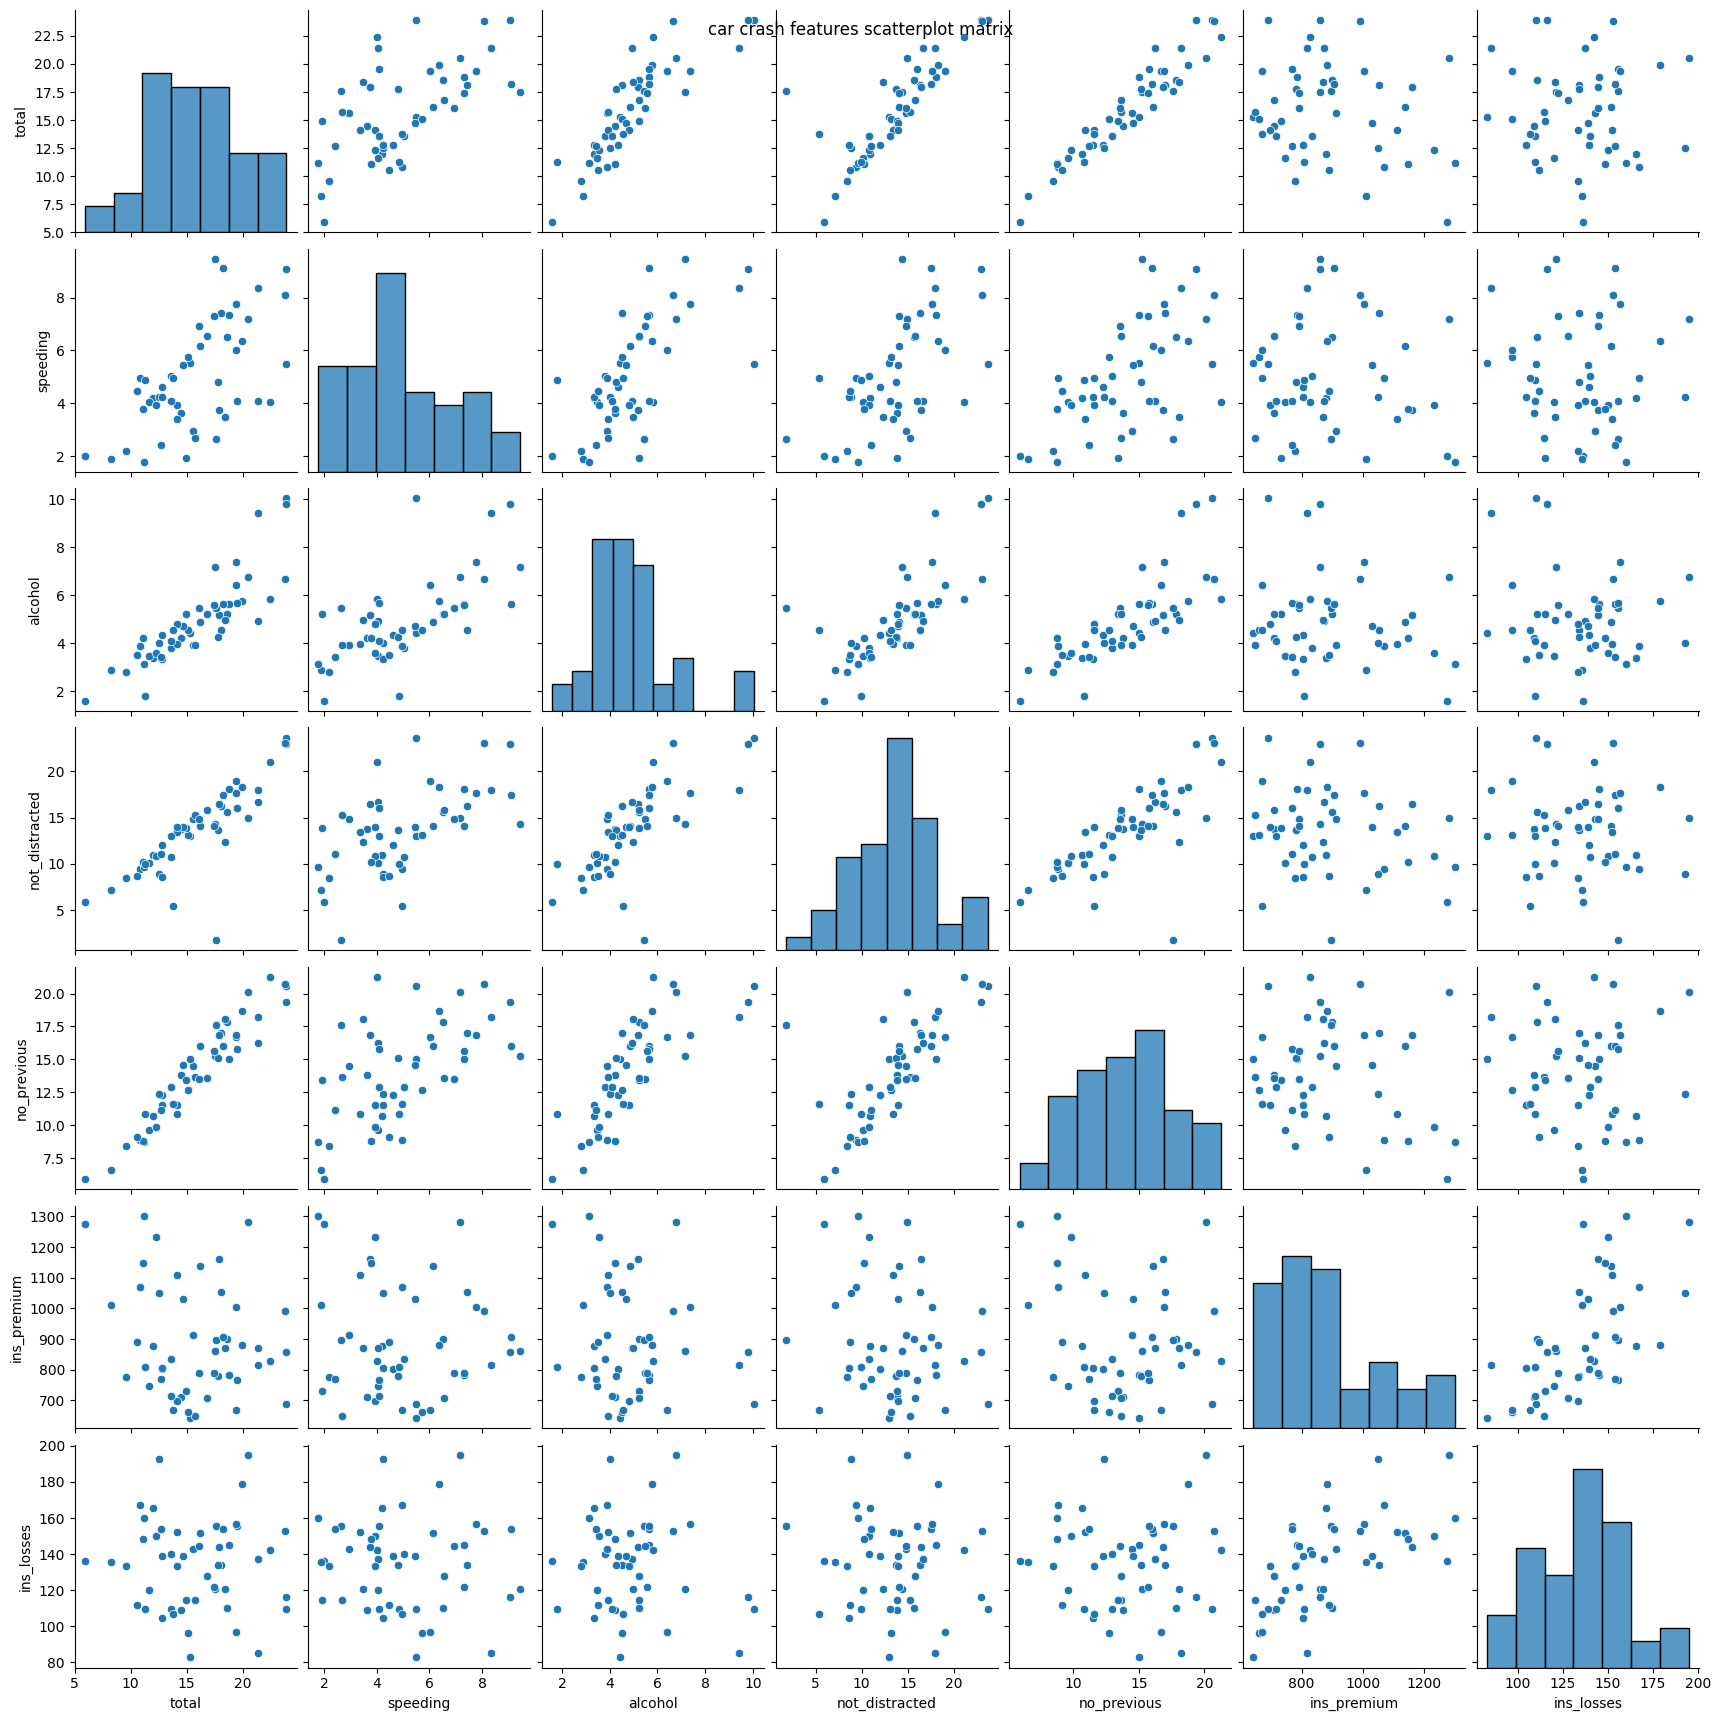

In [19]:
plot = sns.pairplot(df_crash)
plot.fig.suptitle("car crash features scatterplot matrix")

The scatterplots generated in the matrix seem to confirm what the correlation matrix shows above. 

#### Part 1.10 (10 pts)
Use any of matplotlib, seaborn, or plotly (your choice) to create a single scatter plot of the relationship you think is most interesting from the above pairs of numeric features. Use the data frame from 2.3 and color the points by region. Make sure that your plot has:

- An informative title
- Well labeled, *readable* axes
- A legend

**Then** in a markdown cell, **explain** why you thought this pair of features had the most interesting relationship and if adding the regions provided you with any more insight/information about that relationship.

In [21]:
px.scatter(df_crash, x = "alcohol", y = "speeding", color = "region", title = "alcohol and speeding")

I thought it was interesting that higher percentages of alcohol-impaired driving was correlated with higher rates of drivers who were speeding. The two variables seem to have an obvious correlation as those who drink alcohol tend to be more reckless while driving. Adding the regions did not provide more insight into the relationship as the results for each region seem to be mixed.